In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = ['jpg']
import matplotlib
matplotlib.figure.Figure.__repr__ = lambda self: (
    f"<{self.__class__.__name__} size {self.bbox.size[0]:g}"
    f"x{self.bbox.size[1]:g} with {len(self.axes)} Axes>")

import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)
import pandas as pd
import scipy.cluster.hierarchy as sch
import scipy

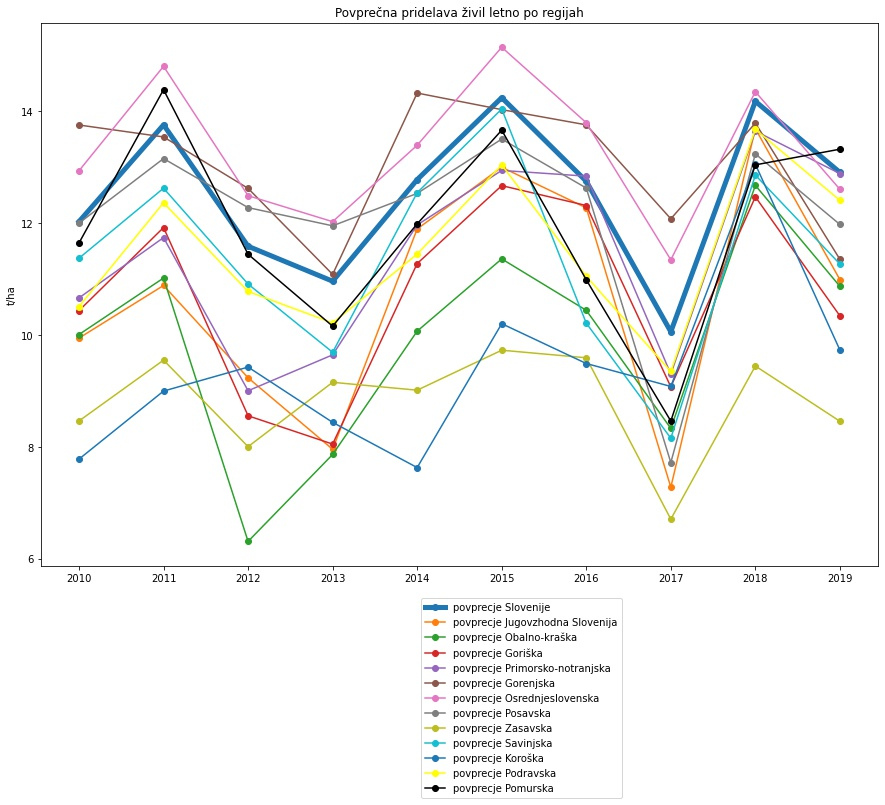

In [240]:
from csv import DictReader

podatki = []
i = 0

readerRatings = DictReader(open('1502410S_20210405-145226.csv', 'rt'))
for row in readerRatings:
    if i != 0:
        podatki.append(row)
    else:
        imenaKrajev = row
    i += 1


imena = []
stevilke = []

for key in podatki:
    imena.append(key["Povprečni pridelek (t/ha) pomembnejših kmetijskih kultur"])
    stevilke.append(key[None])

for key in range(len(stevilke)):
    for i in range(len(stevilke[0])):
        if stevilke[key][i] == "-":
            stevilke[key][i] = 0
        
podatki = {}

for i in range(len(imena)):
    podatki[imena[i]] = stevilke[i]


imenaKrajev = imenaKrajev["Povprečni pridelek (t/ha) pomembnejših kmetijskih kultur"].split(",")  
df = pd.DataFrame(podatki)
df.index = imenaKrajev

string = '"' + str(2010) + ' SLOVENIJA"'

povprecja = []
leta = 0
letnice = 2010

for i in range(2010, 2020, 1):
    
    string = '"' + str(letnice) + ' SLOVENIJA"'
    for i in range(len(df.loc[string])):
        leta += float(df.loc[string][i])

    leta = leta / len(df.loc[string])
    povprecja.append(leta)
    letnice += 1
x = [0,1,2,3,4,5,6,7,8,9]
y = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]

plt.figure(figsize=(15,10))
plt.ylabel("t/ha")
plt.plot(povprecja, marker="o", label="povprecje Slovenije", linewidth=5)
plt.xticks(x,range(2010, 2020, 1))


povprecja = []
leta = 0
letnice = 2010

for i in range(2010, 2020, 1):
    
    string = '"' + str(letnice) + ' Jugovzhodna Slovenija"'
    for i in range(len(df.loc[string])):
        leta += float(df.loc[string][i])

    leta = leta / len(df.loc[string])
    povprecja.append(leta)
    letnice += 1


plt.plot(povprecja, marker="o", label="povprecje Jugovzhodna Slovenija")


povprecja = []
leta = 0
letnice = 2010

for i in range(2010, 2020, 1):
    
    string = '"' + str(letnice) + ' Obalno-kraška"'
    for i in range(len(df.loc[string])):
        leta += float(df.loc[string][i])

    leta = leta / len(df.loc[string])
    povprecja.append(leta)
    letnice += 1


plt.plot(povprecja, marker="o", label="povprecje Obalno-kraška")


povprecja = []
leta = 0
letnice = 2010

for i in range(2010, 2020, 1):
    
    string = '"' + str(letnice) + ' Goriška"'
    for i in range(len(df.loc[string])):
        leta += float(df.loc[string][i])

    leta = leta / len(df.loc[string])
    povprecja.append(leta)
    letnice += 1


plt.plot(povprecja, marker="o", label="povprecje Goriška")

povprecja = []
leta = 0
letnice = 2010

for i in range(2010, 2020, 1):
    
    string = '"' + str(letnice) + ' Primorsko-notranjska"'
    for i in range(len(df.loc[string])):
        leta += float(df.loc[string][i])

    leta = leta / len(df.loc[string])
    povprecja.append(leta)
    letnice += 1


plt.plot(povprecja, marker="o", label="povprecje Primorsko-notranjska")

povprecja = []
leta = 0
letnice = 2010

for i in range(2010, 2020, 1):
    
    string = '"' + str(letnice) + ' Gorenjska"'
    for i in range(len(df.loc[string])):
        leta += float(df.loc[string][i])

    leta = leta / len(df.loc[string])
    povprecja.append(leta)
    letnice += 1


plt.plot(povprecja, marker="o", label="povprecje Gorenjska")

povprecja = []
leta = 0
letnice = 2010

for i in range(2010, 2020, 1):
    
    string = '"' + str(letnice) + ' Osrednjeslovenska"'
    for i in range(len(df.loc[string])):
        leta += float(df.loc[string][i])

    leta = leta / len(df.loc[string])
    povprecja.append(leta)
    letnice += 1


plt.plot(povprecja, marker="o", label="povprecje Osrednjeslovenska")

povprecja = []
leta = 0
letnice = 2010

for i in range(2010, 2020, 1):
    
    string = '"' + str(letnice) + ' Posavska"'
    for i in range(len(df.loc[string])):
        leta += float(df.loc[string][i])

    leta = leta / len(df.loc[string])
    povprecja.append(leta)
    letnice += 1


plt.plot(povprecja, marker="o", label="povprecje Posavska")

povprecja = []
leta = 0
letnice = 2010

for i in range(2010, 2020, 1):
    
    string = '"' + str(letnice) + ' Zasavska"'
    for i in range(len(df.loc[string])):
        leta += float(df.loc[string][i])

    leta = leta / len(df.loc[string])
    povprecja.append(leta)
    letnice += 1


plt.plot(povprecja, marker="o", label="povprecje Zasavska")

povprecja = []
leta = 0
letnice = 2010

for i in range(2010, 2020, 1):
    
    string = '"' + str(letnice) + ' Savinjska"'
    for i in range(len(df.loc[string])):
        leta += float(df.loc[string][i])

    leta = leta / len(df.loc[string])
    povprecja.append(leta)
    letnice += 1


plt.plot(povprecja, marker="o", label="povprecje Savinjska")

povprecja = []
leta = 0
letnice = 2010

for i in range(2010, 2020, 1):
    
    string = '"' + str(letnice) + ' Koroška"'
    for i in range(len(df.loc[string])):
        leta += float(df.loc[string][i])

    leta = leta / len(df.loc[string])
    povprecja.append(leta)
    letnice += 1


plt.plot(povprecja, marker="o", label="povprecje Koroška")

povprecja = []
leta = 0
letnice = 2010

for i in range(2010, 2020, 1):
    
    string = '"' + str(letnice) + ' Podravska"'
    for i in range(len(df.loc[string])):
        leta += float(df.loc[string][i])

    leta = leta / len(df.loc[string])
    povprecja.append(leta)
    letnice += 1


plt.plot(povprecja, marker="o", label="povprecje Podravska", color="yellow")

povprecja = []
leta = 0
letnice = 2010

for i in range(2010, 2020, 1):
    
    string = '"' + str(letnice) + ' Pomurska"'
    for i in range(len(df.loc[string])):
        leta += float(df.loc[string][i])

    leta = leta / len(df.loc[string])
    povprecja.append(leta)
    letnice += 1


plt.plot(povprecja, marker="o", label="povprecje Pomurska", color="black")


plt.legend(bbox_to_anchor=(0.7, -0.05))
plt.title("Povprečna pridelava živil letno po regijah")
plt.show()


df = df.drop(labels=['"2010 SLOVENIJA"', '"2010 Pomurska"', '"2010 Podravska"', '"2010 Koroška"', '"2010 Savinjska"', '"2010 Zasavska"', '"2010 Posavska"', '"2010 Jugovzhodna Slovenija"', '"2010 Osrednjeslovenska"', '"2010 Gorenjska"', '"2010 Primorsko-notranjska"', '"2010 Goriška"', '"2010 Obalno-kraška"', '"2011 SLOVENIJA"', '"2011 Pomurska"', '"2011 Podravska"', '"2011 Koroška"', '"2011 Savinjska"', '"2011 Zasavska"', '"2011 Posavska"', '"2011 Jugovzhodna Slovenija"', '"2011 Osrednjeslovenska"', '"2011 Gorenjska"', '"2011 Primorsko-notranjska"', '"2011 Goriška"', '"2011 Obalno-kraška"', '"2012 SLOVENIJA"', '"2012 Pomurska"', '"2012 Podravska"', '"2012 Koroška"', '"2012 Savinjska"', '"2012 Zasavska"', '"2012 Posavska"', '"2012 Jugovzhodna Slovenija"', '"2012 Osrednjeslovenska"', '"2012 Gorenjska"', '"2012 Primorsko-notranjska"', '"2012 Goriška"', '"2012 Obalno-kraška"'], axis=0)

for i in range(0, 39):
    del imenaKrajev[0]



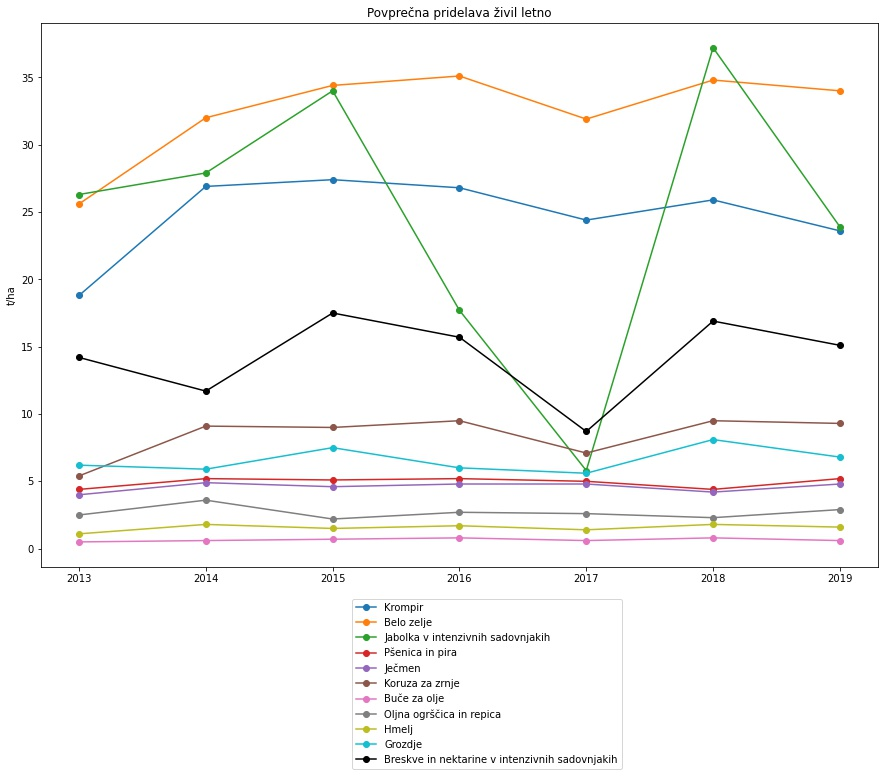

In [239]:

    


povprecja = []
steviloLetno = 0
letnice = 2013

for i in range(2013, 2020, 1):
    
    string = '"' + str(letnice) + ' SLOVENIJA"'
    steviloLetno = float(df.loc[string][3])
    povprecja.append(steviloLetno)
    letnice += 1

plt.figure(figsize=(15,10))
plt.plot(povprecja, marker="o", label="Krompir")
plt.ylabel("t/ha")
x = [0,1,2,3,4,5,6]
plt.xticks(x,range(2013, 2020, 1))

povprecja = []
steviloLetno = 0
letnice = 2013

for i in range(2013, 2020, 1):
    
    string = '"' + str(letnice) + ' SLOVENIJA"'
    steviloLetno = float(df.loc[string][7])
    povprecja.append(steviloLetno)
    letnice += 1


plt.plot(povprecja, marker="o", label="Belo zelje")

povprecja = []
steviloLetno = 0
letnice = 2013

for i in range(2013, 2020, 1):
    
    string = '"' + str(letnice) + ' SLOVENIJA"'
    steviloLetno = float(df.loc[string][9])
    povprecja.append(steviloLetno)
    letnice += 1


plt.plot(povprecja, marker="o", label="Jabolka v intenzivnih sadovnjakih")

povprecja = []
steviloLetno = 0
letnice = 2013

for i in range(2013, 2020, 1):
    
    string = '"' + str(letnice) + ' SLOVENIJA"'
    steviloLetno = float(df.loc[string][0])
    povprecja.append(steviloLetno)
    letnice += 1


plt.plot(povprecja, marker="o", label="Pšenica in pira")

povprecja = []
steviloLetno = 0
letnice = 2013

for i in range(2013, 2020, 1):
    
    string = '"' + str(letnice) + ' SLOVENIJA"'
    steviloLetno = float(df.loc[string][1])
    povprecja.append(steviloLetno)
    letnice += 1


plt.plot(povprecja, marker="o", label="Ječmen")

povprecja = []
steviloLetno = 0
letnice = 2013

for i in range(2013, 2020, 1):
    
    string = '"' + str(letnice) + ' SLOVENIJA"'
    steviloLetno = float(df.loc[string][2])
    povprecja.append(steviloLetno)
    letnice += 1


plt.plot(povprecja, marker="o", label="Koruza za zrnje")

povprecja = []
steviloLetno = 0
letnice = 2013

for i in range(2013, 2020, 1):
    
    string = '"' + str(letnice) + ' SLOVENIJA"'
    steviloLetno = float(df.loc[string][4])
    povprecja.append(steviloLetno)
    letnice += 1


plt.plot(povprecja, marker="o", label="Buče za olje")

povprecja = []
steviloLetno = 0
letnice = 2013

for i in range(2013, 2020, 1):
    
    string = '"' + str(letnice) + ' SLOVENIJA"'
    steviloLetno = float(df.loc[string][5])
    povprecja.append(steviloLetno)
    letnice += 1


plt.plot(povprecja, marker="o", label="Oljna ogrščica in repica")

povprecja = []
steviloLetno = 0
letnice = 2013

for i in range(2013, 2020, 1):
    
    string = '"' + str(letnice) + ' SLOVENIJA"'
    steviloLetno = float(df.loc[string][6])
    povprecja.append(steviloLetno)
    letnice += 1


plt.plot(povprecja, marker="o", label="Hmelj")

povprecja = []
steviloLetno = 0
letnice = 2013

for i in range(2013, 2020, 1):
    
    string = '"' + str(letnice) + ' SLOVENIJA"'
    steviloLetno = float(df.loc[string][8])
    povprecja.append(steviloLetno)
    letnice += 1


plt.plot(povprecja, marker="o", label="Grozdje")

povprecja = []
steviloLetno = 0
letnice = 2013

for i in range(2013, 2020, 1):
    
    string = '"' + str(letnice) + ' SLOVENIJA"'
    steviloLetno = float(df.loc[string][10])
    povprecja.append(steviloLetno)
    letnice += 1


plt.plot(povprecja, marker="o", label="Breskve in nektarine v intenzivnih sadovnjakih", color="black")
plt.legend(bbox_to_anchor=(0.7, -0.05))
plt.title("Povprečna pridelava živil letno")
plt.show()

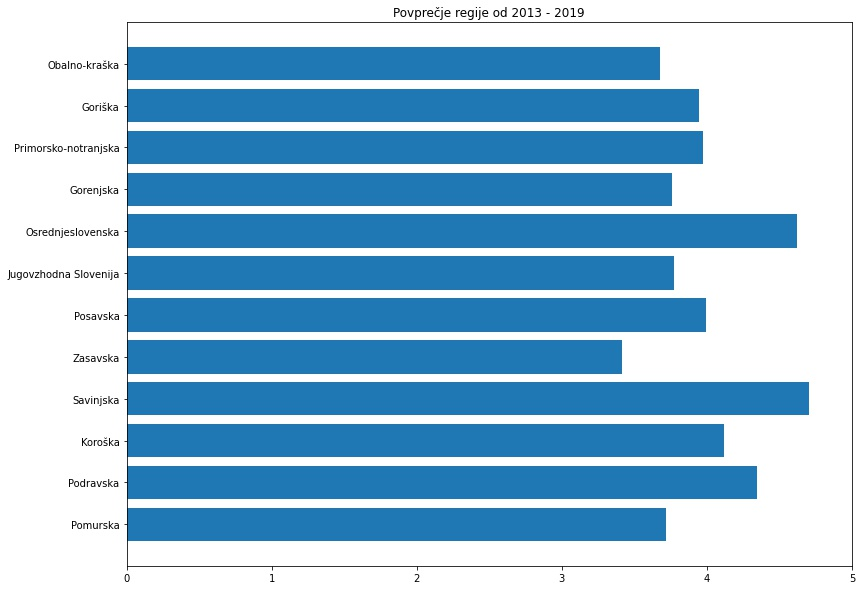

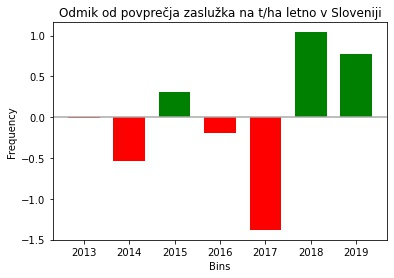

In [213]:
prices = DictReader(open('1505000S.csv', 'rt'))

cene = []
i = 0
letaCene = []
for row in prices:
    if i != 0:
        cene.append(row)
    else:
        letaCene = row
    i += 1
    
imenaCene = []
stevilkeCene = []

for key in cene:
    imenaCene.append(key["Quantities and average prices of purchased agricultural products"])
    stevilkeCene.append(key[None])
    
cene = {}


for i in range(len(imenaCene)):
    cene[imenaCene[i]] = stevilkeCene[i]

letaCene = letaCene["Quantities and average prices of purchased agricultural products"].split(",")  
dfCene = pd.DataFrame(cene)
dfCene.index = letaCene

for i in range(len(dfCene["Pšenica in pira"].values)):
    dfCene["Pšenica in pira"].values[i] = float(dfCene["Pšenica in pira"].values[i]) / 1000
    
for i in range(len(dfCene["Ječmen"].values)):
    dfCene["Ječmen"].values[i] = float(dfCene["Ječmen"].values[i]) / 1000

for i in range(len(dfCene["Koruza za zrnje"].values)):
    dfCene["Koruza za zrnje"].values[i] = float(dfCene["Koruza za zrnje"].values[i]) / 1000

Average_price = {}
cene_po_panogah = []
flag = 0
for x in dfCene.index:
    if flag%2!=0:
        x = x.split()[0]
        Average_price[x] = {}
        for y in dfCene.columns:
            Average_price[x][y] = 0
    flag+=1
flag = 0
poljeSt = 0
poljestV = 0
for c in dfCene.values:
    if flag%2!=0:
        cene_po_panogah.append(c)
    flag+=1    

for a1 in Average_price.keys():
    for a2 in Average_price[a1].keys():
        Average_price[a1][a2]=cene_po_panogah[poljeSt][poljestV]
        poljestV+=1
    poljestV=0
    poljeSt+=1

regije = {'SLOVENIJA': {"2013": {}, "2014": {},"2015": {},"2016": {},"2017": {},"2018": {},"2019": {}}, 'Pomurska': {"2013": {}, "2014": {},"2015": {},"2016": {},"2017": {},"2018": {},"2019": {}}, 'Podravska': {"2013": {}, "2014": {},"2015": {},"2016": {},"2017": {},"2018": {},"2019": {}}, 'Koroška': {"2013": {}, "2014": {},"2015": {},"2016": {},"2017": {},"2018": {},"2019": {}}, 'Savinjska': {"2013": {}, "2014": {},"2015": {},"2016": {},"2017": {},"2018": {},"2019": {}}, 'Zasavska': {"2013": {}, "2014": {},"2015": {},"2016": {},"2017": {},"2018": {},"2019": {}}, 'Posavska': {"2013": {}, "2014": {},"2015": {},"2016": {},"2017": {},"2018": {},"2019": {}}, 'Jugovzhodna Slovenija': {"2013": {}, "2014": {},"2015": {},"2016": {},"2017": {},"2018": {},"2019": {}}, 'Osrednjeslovenska': {"2013": {}, "2014": {},"2015": {},"2016": {},"2017": {},"2018": {},"2019": {}}, 'Gorenjska': {"2013": {}, "2014": {},"2015": {},"2016": {},"2017": {},"2018": {},"2019": {}}, 'Primorsko-notranjska': {"2013": {}, "2014": {},"2015": {},"2016": {},"2017": {},"2018": {},"2019": {}}, 'Goriška': {"2013": {}, "2014": {},"2015": {},"2016": {},"2017": {},"2018": {},"2019": {}}, 'Obalno-kraška': {"2013": {}, "2014": {},"2015": {},"2016": {},"2017": {},"2018": {},"2019": {}}}

for key in regije:
    for i in regije[key]:
        for j in range(len(df.loc['"' + str(i) + " " + str(key) + '"'])):
            regije[key][i][df.loc['"' + str(i) + " " + str(key) + '"'].keys()[j]] = df.loc['"' + str(i) + " " + str(key) + '"'][j]
            
regijePovprecno = {}
            
for key in regije:
    regijePovprecno[key] = {}
    for i in regije[key]:
        avg = 0
        for j in regije[key][i]:
            avg += (float(regije[key][i][j]) * float(Average_price['"' + str(i)][j]))
        avg = avg / len(regije[key][i])
        regijePovprecno[key][i] = avg
        

regijeCenaPovprecno = {}

for key in regijePovprecno:
    avg = 0
    for i in regijePovprecno[key]:
        avg += regijePovprecno[key][i]
    avg = avg / len(regijePovprecno[key])
    regijeCenaPovprecno[key] = avg
    
fig, ax = plt.subplots(figsize=(13,10))


podatki = {}

for key in regijeCenaPovprecno:
    if key != "SLOVENIJA":
        podatki[key] = regijeCenaPovprecno[key]
        
x = np.arange(len(podatki))
ax.barh(x, podatki.values())
ax.set_yticks(x)
plt.title("Povprečje regije od 2013 - 2019")
ax.set_yticklabels(podatki.keys())
ax.set_xticks(np.arange(6))
ax.set_xticklabels(range(0,6))

plt.show()

a=[regijePovprecno["SLOVENIJA"][key] for key in regijePovprecno["SLOVENIJA"]]
av = sum(a)/len(a)



for i in range(len(a)):
    a[i] = a[i] - av

povprecje = 0
idx=np.array([2013,2014,2015,2016,2017,2018,2019])
barve = ['green' if (x > 0) else 'red' for x in a ]
plt.bar(idx, a, color=barve, width=0.7, alpha = 1)
plt.xlabel('Bins')
plt.title("Odmik od povprečja zaslužka na t/ha letno v Sloveniji")
plt.ylabel('Frequency')
plt.axhline(y=0, color='darkgray', linestyle='-')

plt.show()